In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#1. Importing and Reading data set
data = pd.read_csv("TSLA.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [4]:
#2. Data Preprocessing for Time Series Data
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

In [5]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
#3. Data Cleaning: Handling Missing Values
data.dropna(inplace=True)
data.isnull().sum() #hence there exists no null values from the below output

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_6768\3060090696.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


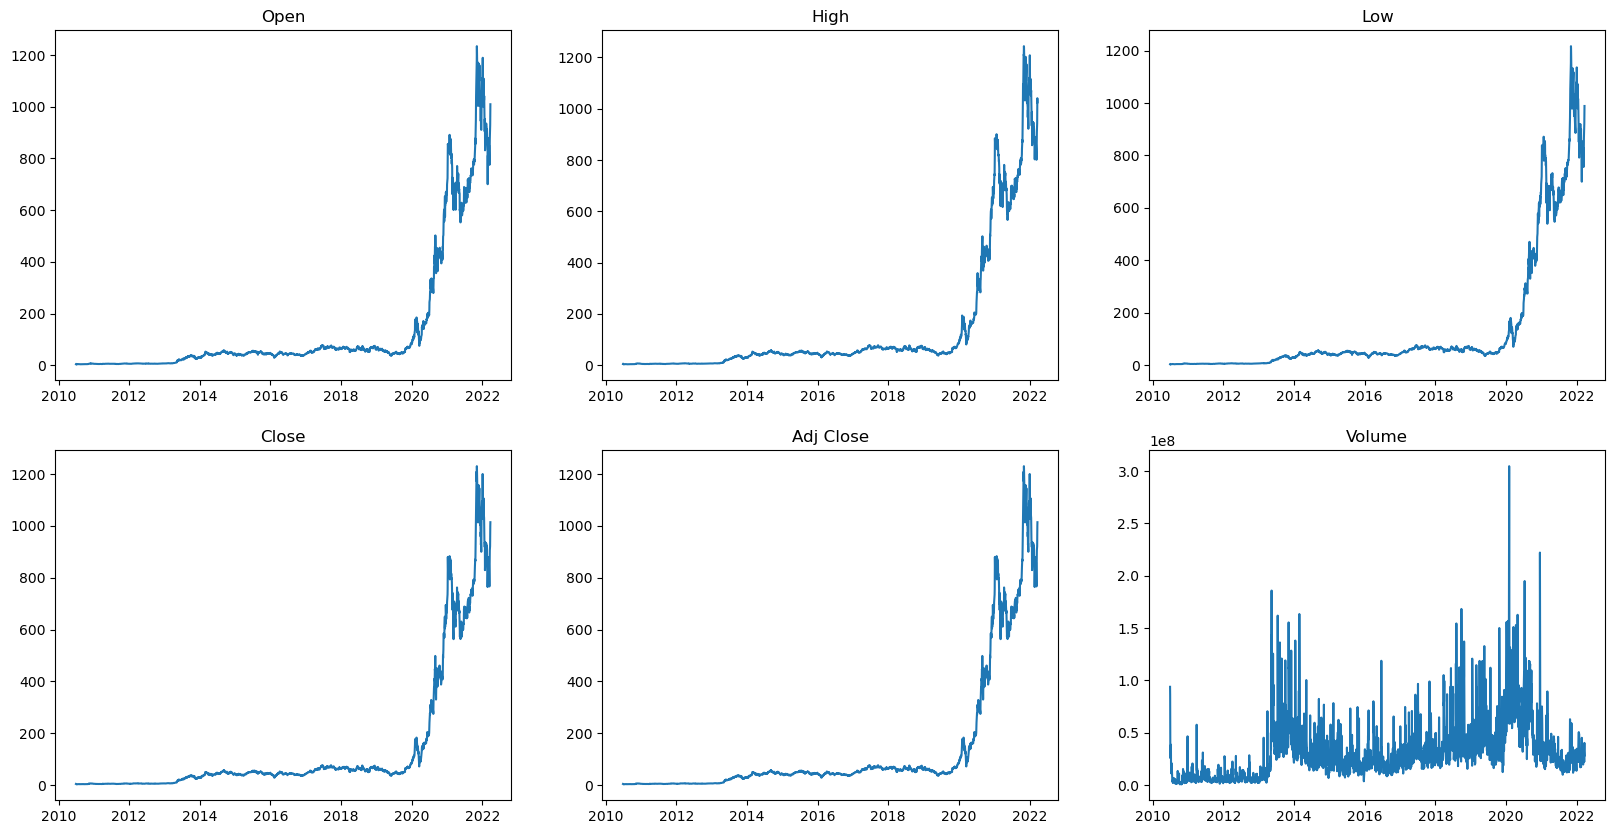

In [7]:
#4. Data Exploration
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))

for i,cols in enumerate(['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']):
    plt.subplot(2,3,i+1)
    plt.title(cols)
    plt.plot(data[cols])
plt.show()

In [10]:
#5. Dropping any unnecessary features.
data.drop(['Adj Close'], axis = 1, inplace = True)

In [12]:
data

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2010-06-29,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
2010-06-30,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2010-07-01,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
2010-07-02,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
2010-07-06,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500
2022-03-21,2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200
2022-03-22,2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500


In [14]:
#6. Feature Selection: Selecting the feature set and target variable
target_var = pd.DataFrame(data['Close'])
features = data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [15]:
target_var

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-18,905.390015
2022-03-21,921.159973
2022-03-22,993.979980


In [16]:
features

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500


In [18]:
#7. Feature scaling: scaling features to a particular range
scaler = StandardScaler()
feature_transform = scaler.fit_transform(features)
feature_transform

array([[-0.5395597 , -0.53464008, -0.54123978, -0.53576357,  2.23441875],
       [-0.53412776, -0.53040273, -0.5365133 , -0.53581155,  1.95220804],
       [-0.53475975, -0.53392083, -0.53899963, -0.53730707,  0.34952933],
       ...,
       [ 3.16520264,  3.34644878,  3.22617088,  3.41976587,  0.14207087],
       [ 3.36496062,  3.51391018,  3.45039182,  3.44027926,  0.31848472],
       [ 3.48411932,  3.45054545,  3.50126703,  3.49950011, -0.30067398]])

In [19]:
#8. Splitting the dataset into Train set and Test set by 80/20
X_train, X_test, y_train, y_test = train_test_split(feature_transform, target_var, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2364, 5) (592, 5) (2364, 1) (592, 1)
